In [89]:
from db_builder import create_db
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt

In [68]:
# This block makes an SQLite database 
db_kaggle = create_db('../database/kaggle.db')
db_kaggle.create_table()


SQL database built at ../database/kaggle.db


In [69]:
#kaggle_data = pd.read_csv('../database/training.1600000.processed.noemoticon.csv',encoding = "cp1252")

kaggle_data.head()

,a,b,c,d,e,f
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [78]:
# This block demonstrates how to add entries into the database

for index, row in kaggle_data.iterrows():
    print(index,end="\r")
    
    entry = db_kaggle.create(
        sentiment = row['a'],
        username = row['e'],
        date = row['c'],
        content= row['f']
    )

0.005707740783691406
Num entries:6208


6208

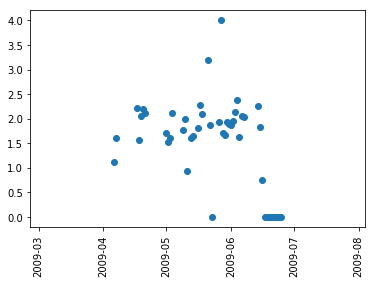

In [162]:
# This block demonstrates how to query the database
start = time.time()
query = (db_kaggle
         .select()
         .where(db_kaggle.content.match('Money')))
end = time.time()
print(end - start)

print('Num entries:' + str(len(query)))

# Now we're going to extract the sentiment and date information and get the average sentiment on a particular date
sentiment_array = []
date_dict = {}
count_dict = {}


for entry in query:
    sentiment_array.append(entry.sentiment)

    # We need to remove the timezone, day and hour data
    temp_date = entry.date.split()
    
    temp_date.pop(0)
    temp_date.pop(2)
    temp_date.pop(2)

    # This makes it a datetime object for easier working
    formatted_date = datetime.datetime.strptime(' '.join(temp_date), '%b %d %Y')
    
    # We now take the average of the sentiment by keeping a running average
    if formatted_date in date_dict:
        count_dict[formatted_date] = count_dict[formatted_date] + 1
        date_dict[formatted_date] = (date_dict[formatted_date] + 
                                    (entry.sentiment-date_dict[formatted_date])/
                                     count_dict[formatted_date])
    else:
        count_dict[formatted_date] = 0
        date_dict[formatted_date] = 0
      

plt.scatter(date_dict.keys(),date_dict.values())   
plt.xticks(rotation='vertical')
plt.plot()

